<h1 style="color:blue;">Basic design of RF systems</h1>

S. Albright, H. Damerau, A. Lasheen, F. Tecker

<h1 style="color:red;">Links</h1>

<ul style="list-style-type:disc;">
    <li><a href="http://cas.web.cern.ch/schools/vysoke-tatry-2019">Introductory CAS website</a></li>
    <li><a href="http://cas.web.cern.ch/sites/cas.web.cern.ch/files/programmes/vysoke-tatry-2019-programme_2.pdf">Programme</a></li>
</ul> 

Python distribution for trasverse exercises in Slovakia (from Guido): <a href="https://codimd.web.cern.ch/s/HkfQy3YbB">https://codimd.web.cern.ch/s/HkfQy3YbB</a>

<h1 style="color:rgb(255,0,0);">Second afternoon</h1>

<h2>Functions and classes to be imported from 'support_functions.py'</h2>

<table>
    <thead>
        <tr>
            <th>Function</th>
            <th>Syntax</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Plot phase space</td>
            <td><TT>plotPhaseSpace(distribution, figname=None, xbins=50, ybins=50, xlim=None, ylim=None)</TT></td>
        </tr>
        <tr>
            <td>Calculate oscillation spectrum</td>
            <td><TT>oscillation_spectrum(phase_track, fft_zero_padding=0)</TT></td>
        </tr>
        <tr>
            <td>Calculate synchrontron tune</td>
            <td><TT>synchrotron_tune(phase_track, fft_zero_padding=0)</TT></td>
        </tr>
        <tr>
            <td>Generation of a bunch distribution</td>
            <td><TT>generateBunch(bunch_position, bunch_length, bunch_energy, energy_spread, n_macroparticles)</TT></td>
        </tr>
        <tr>
            <td>Calculate separatrix</td>
            <td><TT>separatrix(phase_array, eta, beta, energy, charge, voltage, harmonic, energy_gain)</TT></td>
        </tr>
        <tr>
            <td>Run animation</td>
            <td><TT> run_animation(particles, trackingFunction, figname, iterations, framerate,
                  xbins=50, ybins=50, xlim=None, ylim=None,
                  phase_sep=None, separatrix_array=None)</TT></td>
        </tr>
        <tr>
            <td>Bucket area reduction ratio</td>
            <td><TT> reduction_ratio(deltaE, voltage)</TT></td>
        </tr>
    </tbody>
</table>

<h2>Bucket area reduction ratio depdening on stable phase</h2>
<ul style="list-style-type:disc;">
    <li>Bucket area reduction ratio depdening on stable phase</li>
    <li>Use approximation (S. Y. Lee book, p. 242): $\alpha(\phi_\mathrm{S}) \simeq \cfrac{1 - \sin \phi_\mathrm{S}}{1 + \sin \phi_\mathrm{S}}$</li>
</ul> 

<h2>Import modules</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sciCont

<h1 style="color:rgb(0,0,255);">Optimizing the CERN-PS for LHC-type beams: acceleration at high frequency</h1>

<h3>Design an RF system optimized for injection into the PS from a $2.5\,\mathrm{GeV}$ Linac</h3>
(see, e.g. Fig. 3 of, <a href="https://indico.cern.ch/event/67839/contributions/1231573/attachments/1022547/1455755/OtherScenarios.pdf">C. Carli, Chamonix 2010</a>)

<b>Guidelines:</b>
<ul style="list-style-type:disc;">
    <li>Higher injection energy: $E_\mathrm{kin} = 2.5\,\mathrm{GeV}$.</li>
    <li>Bunch spacing of $25\,\mathrm{ns}$.
    <li>RF system optimized under these conditions.</li>
</ul> 

<b>Basic parameters of the Proton Synchrotron (PS) at CERN</b>
<table>
    <thead>
        <tr>
            <th>Parameter</th>
            <th></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Energy range</td>
            <td>$E_\mathrm{kin} = 2.5\,\mathrm{GeV}...26\,\mathrm{GeV}$</td>
        </tr>
        <tr>
            <td>Circumference</td>
            <td>$2 \pi R = 628\,\mathrm{m}$</td>
        </tr>
        <tr>
            <td>Bending radius</td>
            <td>$\rho = 70.079\,\mathrm{m}$</td>
        </tr>
        <tr>
            <td>Transition gamma</td>
            <td>$\gamma_\mathrm{tr} = 6.1$</td>
        </tr>
        <tr>
            <td>Acceleration time</td>
            <td>$1\,\mathrm{s}$</td>
        </tr>
        <tr>
            <td>Longitudinal emittance per bunch</td>
            <td>$\varepsilon_\mathrm{l} = 0.35\,\mathrm{eVs}$</td>
        </tr>
        <tr>
            <td>Maximum bucket filling factor</td>
            <td>$\varepsilon_\mathrm{l}/A_\mathrm{bucket} = 0.8$</td>
        </tr>
        <tr>
            <td>Total beam intensity</td>
            <td>$N = 2 \cdot 10^{13} \,\mathrm{protons}$</td>
        </tr>
    </tbody>
</table>

<h2>Exercise 1: Average energy gain and stable phase</h2>

<ul style="list-style-type:disc;">
    <li>How much energy does the particle gain during each turn assuming a constant ramp rate?</li>
    <li>What would be the stable phase for an RF voltage of 200 kV?</li>
</ul> 

In [2]:
injectionEnergy = 2.5E9 #eV
extractionEnergy = 26E9 #eV

c0 = sciCont.c
e0 = sciCont.e
protonMass = sciCont.physical_constants['proton mass energy equivalent in MeV'][0]*1E6
protonCharge = 1 #e

momentumInjection = np.sqrt((protonMass + injectionEnergy)**2 - protonMass**2)
momentumExtraction = np.sqrt((protonMass + extractionEnergy)**2 - protonMass**2)

print("Momentum at injection:  "+str(momentumInjection/1E9) +" GeV/c")
print("Momentum at extraction: "+str(momentumExtraction/1E9) +" GeV/c")

Momentum at injection:  3.3077727259441514 GeV/c
Momentum at extraction: 26.921926904060935 GeV/c


In [3]:
circumference = 2*np.pi*100 #m
bendingRadius = 70.079      #m
accelerationDuration = 1    #s

magneticFieldInjection = momentumInjection / (c0*bendingRadius*protonCharge)
magneticFieldExtraction = momentumExtraction / (c0*bendingRadius*protonCharge)
averageBDot = (magneticFieldExtraction - magneticFieldInjection)/accelerationDuration

print("Average B-Dot: "+str(averageBDot)+" T/s")

Average B-Dot: 1.1239934891041807 T/s


In [4]:
averageEnergyGainPerTurn = 2*np.pi*protonCharge*circumference/(2*np.pi)*bendingRadius*averageBDot
print("Average per turn energy gain: "+str(averageEnergyGainPerTurn)+" eV")

Average per turn energy gain: 49491.60748180557 eV


In [5]:
rfVoltage = 200E3 #V
stablePhase = np.arcsin(averageEnergyGainPerTurn/rfVoltage)
print("Stable phase angle: "+str(180/np.pi*stablePhase)+" deg")

Stable phase angle: 14.327142764919783 deg


<h2>Exercise 2: Power transfer to the beam</h2>

<ul style="list-style-type:disc;">
    <li>How much power is transferred from the RF system to the beam?</li>
</ul> 

In [6]:
nProtons = 1E13
energyGainJoules = (extractionEnergy - injectionEnergy)*e0*nProtons
averagePowerToBeam = energyGainJoules / accelerationDuration
print("Average power to beam: "+str(averagePowerToBeam/1E3)+" kW")

Average power to beam: 37.6511505888 kW


<h2>Exercise 3: RF frequency and harmonic</h2>

<ul style="list-style-type:disc;">
    <li>Choose RF frequency and harmonic of the RF system.</li>
    <li>Note a few arguments for your choice.</li>
    <li>What is the frequency range of the RF system?</li>  
</ul> 

In [7]:
betaInjection = np.sqrt(1 - (protonMass/(protonMass + injectionEnergy))**2)
betaExtraction = np.sqrt(1 - (protonMass/(protonMass + extractionEnergy))**2)

print(f"beta injection: {betaInjection}, beta extraction: {betaExtraction}")

beta injection: 0.9620450760527051, beta extraction: 0.9993932358694079


In [8]:
revolutionFrequencyInjection = c0*betaInjection/circumference
revolutionFrequencyExtraction = c0*betaExtraction/circumference

print("Revolution frequency at injection:  "+str(revolutionFrequencyInjection/1E3)+ "kHz")
print("Revolution frequency at extraction: "+str(revolutionFrequencyExtraction/1E3)+ "kHz")

Revolution frequency at injection:  459.02491165918104kHz
Revolution frequency at extraction: 476.84500781396434kHz


<h4>Arguments for choice of RF frequency</h4>
<ul>
    <li>25 ns bunch spacing suggests 40 MHz</li>
</ul> 

<h3>Choice of harmonic number</h3>

In [9]:
flatTopRFFrequency = 1/25E-9
harmonicNumber = flatTopRFFrequency/revolutionFrequencyExtraction
print("40 MHz/revolution frequency at extraction: "+str(harmonicNumber))
harmonicNumber = int(round(harmonicNumber))
print("Nearest integer harmonic number, h = "+str(harmonicNumber))

40 MHz/revolution frequency at extraction: 83.88469910458944
Nearest integer harmonic number, h = 84


<h4>RF frequency swing</h4>

In [10]:
injectionRFFrequency = harmonicNumber * revolutionFrequencyInjection
extractionRFFrequency = harmonicNumber * revolutionFrequencyExtraction

frequencySwingFRev = revolutionFrequencyExtraction - revolutionFrequencyInjection
frequencySwingRF = extractionRFFrequency - injectionRFFrequency

print("Revolution frequency swing: "+str(frequencySwingFRev/1E3)+" kHz ("+str(100*frequencySwingFRev/revolutionFrequencyInjection)+" %)")
print("RF frequency swing: "+str(frequencySwingRF/1E6)+" MHz")

Revolution frequency swing: 17.820096154783272 kHz (3.8821631903094658 %)
RF frequency swing: 1.4968880770017952 MHz


<h2>Exercise 4: Calculate bucket area during the cycle, determine RF voltage along the cycle</h2>

<ul style="list-style-type:disc;">
    <li>Plot momentum, kinetic energy and revolution frequency (and/or further parameters) during the cycle.</li>
    <li>Calculate the bucket area along the cycle and chose an RF voltage such that a bunch with $0.35\,\mathrm{eV}$ longitudinal emittance can be comfortably accelerated, e.g $\varepsilon_\mathrm{l}/A_\mathrm{bucket} \simeq 0.8$.</li>
</ul> 

In [11]:
longitudinalEmittance = 0.35 #eVs
targetFillingFactor = 0.8
targetBucketArea = longitudinalEmittance / targetFillingFactor

print("Target bucket area: "+str(targetBucketArea)+" eVs")

Target bucket area: 0.43749999999999994 eVs


<h4>Momentum, energy and revolution frequency during cycle</h4>

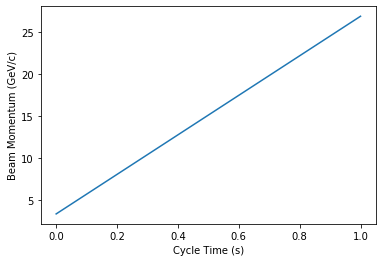

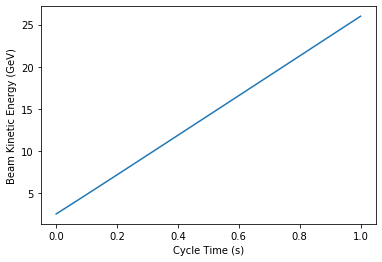

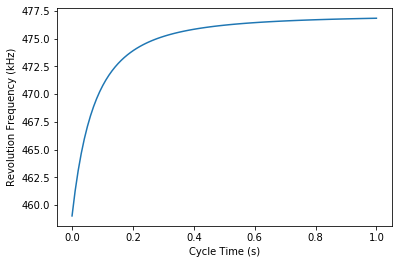

In [12]:
import matplotlib.pyplot as plt

timeRange = np.linspace(0, 1, 100)
BFieldRange = np.linspace(magneticFieldInjection, magneticFieldExtraction, len(timeRange))
momentumRange = protonCharge*bendingRadius*BFieldRange*c0

plt.plot(timeRange, momentumRange/1e9)
plt.xlabel("Cycle Time (s)")
plt.ylabel("Beam Momentum (GeV/c)")
plt.show()

energyRange = np.sqrt(momentumRange**2 + protonMass**2)

plt.plot(timeRange, (energyRange - protonMass)/1E9)
plt.xlabel("Cycle Time (s)")
plt.ylabel("Beam Kinetic Energy (GeV)")
plt.show()

betaRange = momentumRange/energyRange
gammaRange = 1/np.sqrt(1-betaRange**2)

fRevRange = c0*betaRange/circumference

plt.plot(timeRange, fRevRange/1e3)
plt.xlabel("Cycle Time (s)")
plt.ylabel("Revolution Frequency (kHz)")
plt.show()

<h4>Bucket area</h4>

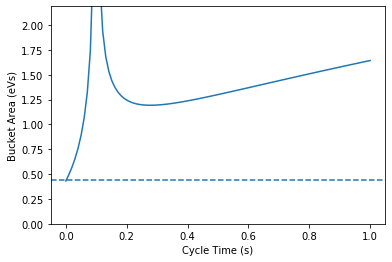

In [13]:
from support_functions import reduction_ratio

rfHarmonic = 84
rfVoltage = 500E3 #V
gamma_T = 6.1

timeRange = np.linspace(0, 1, 100)
BFieldRange = np.linspace(magneticFieldInjection, magneticFieldExtraction, len(timeRange))
momentumRange = protonCharge*bendingRadius*BFieldRange*c0
energyRange = np.sqrt(momentumRange**2 + protonMass**2)
gammaRange = 1/np.sqrt(1-betaRange**2)
phaseSlipFactor = 1/gamma_T**2 - 1/gammaRange**2

reductionFactor = reduction_ratio(averageEnergyGainPerTurn, rfVoltage)

bucketAreaRange = 4/c0*circumference*np.sqrt((2*energyRange*rfVoltage)/ \
                                             (np.pi**3*rfHarmonic**3*np.abs(phaseSlipFactor))) \
                      *reductionFactor

plt.plot(timeRange, bucketAreaRange)
plt.axhline(targetBucketArea, linestyle = '--')
plt.ylim(0,5*targetBucketArea)
plt.xlabel("Cycle Time (s)")
plt.ylabel("Bucket Area (eVs)")
plt.show()

<h2>Exercise 5: RF cavity, number of cavities, RF amplifier power</h2>

<ul style="list-style-type:disc;">
    <li>Choose an approriate type of RF cavity.</li>
    <li>How many cavities would you install?</li>
    <li>Please note some arguments for the discussion.</li>  
</ul> 

<ul style="list-style-type:disc;">
    <li>Frequeny range of about 4 % would require a fixed frequency cavities with a quality factor of only 26 $\rightarrow$ too low</li>
    <li>Need tuned RF cavities $\rightarrow$ partially filled with ferrite material</li>
    <li>Bias ferrite material to tilt hysteresis curve $\rightarrow$ change effective $\mu$</li>
    <li>Cavity could be similar to the one for PS2 or Fermilab booster, but with reduced frequency range</li>
    <li>Single cavity sufficient for 100 kV at 40 MHz (zero beam current)</li>
    <li>Large RF system: would require about 5 cavities (or more)</li>
</ul> 

<h2>Exercise 6: Requirements for beam loading</h2>

<ul style="list-style-type:disc;">
    <li>What is the beam induced voltage and power?</li>
    <li>Under which circumstances do you really need that power?</li>  
</ul> 

In [14]:
RUponQ = 100
VInduced = nProtons*e0*RUponQ*harmonicNumber*revolutionFrequencyExtraction*2*np.pi

print("Beam loading induced voltage (flat top): "+str(VInduced/1E3)+" kV")

Beam loading induced voltage (flat top): 40.32243818979762 kV


In [15]:
beamCurrent = e0*nProtons*revolutionFrequencyExtraction
beamLoadingPower = VInduced*beamCurrent

print(f"Beam loading power (flat top): "+str(beamLoadingPower/1E3)+" kW")

Beam loading power (flat top): 30.805936458470182 kW


<ul style="list-style-type:disc;">
    <li>This additional power would be needed to fully compensate beam loading and operate the cavity at any phase</li>
</ul> 

<h2>Exercise 7: Comparison with RF systems at Fermilab Booster</h2>

<ul style="list-style-type:disc;">
    <li>Compare the parameters of your RF system with the one of the Booster synchrotron at Fermilab.</li>  
</ul> 

<table>
    <thead>
        <tr>
            <th>Parameter</th>
            <th>Unit</th>
            <th>PS (with 40 MHz RF)</th>
            <th>Fermilab Booster</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Beam energy, $E_\mathrm{kin}$</td>
            <td>GeV</td>
            <td>2 to 26</td>
            <td>0.4 to 8</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Circumference, $2\pi R$</td>
            <td>m</td>
            <td>628.3</td>
            <td>467.9</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Bending radius, $\rho$</td>
            <td>m</td>
            <td>70.08</td>
            <td>43.7</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Acceleration time</td>
            <td>s</td>
            <td>1</td>
            <td>0.033</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>RF harmonic, $h$</td>
            <td></td>
            <td>84</td>
            <td>84</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>RF frequency, $f_\mathrm{RF}$</td>
            <td>MHz</td>
            <td>38.56 to 40.05</td>
            <td>37.86 to 52.81</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>RF voltage, $V_\mathrm{RF}$</td>
            <td>kV</td>
            <td>500</td>
            <td>860</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Number of cavities</td>
            <td></td>
            <td>~5</td>
            <td>17</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Longiduinal emittance, $\varepsilon_\mathrm{l}$</td>
            <td>eVs</td>
            <td>0.35</td>
            <td>0.25</td>
        </tr>
    </tbody>
</table>

<h1 style="color:rgb(0,0,255);">Design of an RF system upgrade for an electron storage ring</h1>

<h3>Design an RF system to run the Soleil electron storage ringe at higher energy and beam current</h3>

<b>Guidelines:</b>
<ul style="list-style-type:disc;">
    <li>Higher energy: $2.75\,\mathrm{GeV}$ instead of ($3.5\,\mathrm{GeV}$).</li>
    <li>Higher beam current: $800\,\mathrm{mA}$ instead of $500\,\mathrm{mA}$.</li>
    <li>Bunch spacing of $25\,\mathrm{ns}$.
    <li>Design the new RF system which can work in combination with the existing one.</li>
</ul> 

<b>Basic parameters of the Soleil electron storage ring (<a href="https://www.synchrotron-soleil.fr/en/research/sources-and-accelerators/parameters-accelerators-storage-ring">parameter table</a>)</b>
<table>
    <thead>
        <tr>
            <th>Parameter</th>
            <th></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Beam energy</td>
            <td>$E = 2.75\,\mathrm{GeV}\rightarrow 3.5\,\mathrm{GeV}$</td>
        </tr>
        <tr>
            <td>Beam current</td>
            <td>$I_\mathrm{b} = 500\,\mathrm{mA} \rightarrow 800\,\mathrm{mA}$</td>
        </tr>
        <tr>
            <td>Circumference</td>
            <td>$2 \pi R = 354.097\,\mathrm{m}$</td>
        </tr>
        <tr>
            <td>Bending radius</td>
            <td>$\rho = 5.36\,\mathrm{m}$</td>
        </tr>
        <tr>
            <td>Momentum compaction factor</td>
            <td>$\alpha = 1/\gamma^2_\mathrm{tr} - 1/\gamma^2 = 4.16 \cdot 10^{-4}$</td>
        </tr>
        <tr>
            <td>Harmonic of RF system</td>
            <td>$h = 416$</td>
        </tr>
        <tr>
            <td>RF frequency</td>
            <td>$f_\mathrm{RF} = 352.2\,\mathrm{MHz}$</td>
        </tr>
    </tbody>
</table>

<h2>Exercise 1: Average energy loss per turn</h2>

<ul style="list-style-type:disc;">
    <li>Calculate the average energy loss per turn to be restituted before and after the upgrade.</li>
    <li>Plot the energy loss versus beam energy.</li>
</ul> 

In [16]:
electronMass = sciCont.physical_constants['electron mass energy equivalent in MeV'][0]*1E6 #eV
electronCharge = 1 #e
bendingRadius = 5.36 #m
epsilon0 = sciCont.epsilon_0 #F/m
c0 = sciCont.c #m/s
e0 = sciCont.e #C
beamEnergyBefore = 2.75E9 #eV

energyLossPerTurnBefore = e0**2*(beamEnergyBefore/electronMass)**4/(3*epsilon0*bendingRadius)/e0

print("Energy loss per turn before upgrade: "+str(energyLossPerTurnBefore/1E3)+" keV")

Energy loss per turn before upgrade: 943.900841372113 keV


In [17]:
beamEnergyAfter = 3.5E9 #eV

energyLossPerTurnAfter = e0**2*(beamEnergyAfter/electronMass)**4/(3*epsilon0*bendingRadius)/e0

print("Energy loss per turn after upgrade: "+str(energyLossPerTurnAfter/1E3)+" keV")

Energy loss per turn after upgrade: 2476.667899880548 keV


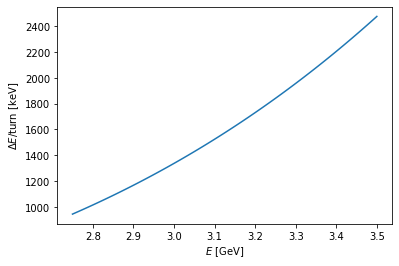

In [18]:
beamEnergyRange = np.linspace(beamEnergyBefore, beamEnergyAfter, 100)
energyLossPerTurn = e0**2*(beamEnergyRange/electronMass)**4/(3*epsilon0*bendingRadius)/e0

plt.plot(beamEnergyRange/1E9, energyLossPerTurn/1E3)
plt.xlabel("$E$ [GeV]")
plt.ylabel("$\Delta E/$turn [keV]")
plt.show()

<h2>Exercise 2: Average RF power</h2>

<ul style="list-style-type:disc;">
    <li>What is the average power to the beam before and after the upgrade?</li>
    <li>Plot the required RF power versus beam energy.</li>
    <li>Why should the installed RF power pratically be higher?</li>
</ul> 

In [19]:
#Electrons therefore beta = 1
circumference = 354.097
revolutionFrequency = c0/circumference

print("Revolution frequency: "+str(revolutionFrequency/1E3)+" kHz")

Revolution frequency: 846.63936153088 kHz


In [20]:
beamCurrent = 500E-3 #A
nElectrons = (beamCurrent/e0)/revolutionFrequency
radiationPowerBefore = energyLossPerTurnBefore*revolutionFrequency*nElectrons*e0

print(f"Average power to beam before upgrade: "+str(radiationPowerBefore/1E3)+" kW")

Average power to beam before upgrade: 471.9504206860564 kW


In [21]:
beamCurrent = 800E-3 #A
nElectrons = (beamCurrent/e0)/revolutionFrequency
radiationPowerAfter = energyLossPerTurnAfter*revolutionFrequency*nElectrons*e0

print(f"Average power to beam before upgrade: "+str(radiationPowerAfter/1E3)+" kW")

Average power to beam before upgrade: 1981.3343199044384 kW


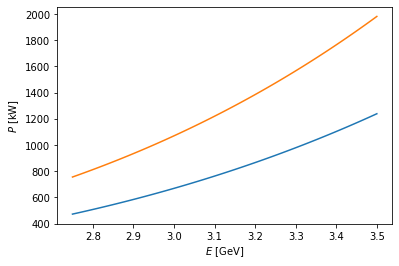

In [22]:
beamEnergyRange = np.linspace(beamEnergyBefore, beamEnergyAfter, 100)
energyLossPerTurn = e0**2*(beamEnergyRange/electronMass)**4/(3*epsilon0*bendingRadius)/e0

beamCurrent = 500E-3
radiationPowerBeforeCurrent = energyLossPerTurn*revolutionFrequency*beamCurrent/revolutionFrequency

beamCurrent = 800E-3
radiationPowerAfterCurrent = energyLossPerTurn*revolutionFrequency*beamCurrent/revolutionFrequency

plt.plot(beamEnergyRange/1E9, radiationPowerBeforeCurrent/1E3)
plt.plot(beamEnergyRange/1E9, radiationPowerAfterCurrent/1E3)
plt.xlabel("$E$ [GeV]")
plt.ylabel("$P$ [kW]")
plt.show()

<h2>Exercise 3: Chose RF frequency. Arguments?</h2>

<ul style="list-style-type:disc;">
    <li>Chose the RF frequency and harmonic of the additional RF system.</li>
    <li>Note a few arguments supporting your choice.</li>
</ul> 

In [23]:
minimumFrequency = 1/25E-9
minimumHarmonic = minimumFrequency/revolutionFrequency
print("Minimum frequency: "+str(minimumFrequency/1E6)+" MHz")
print("40 MHz/revolution frequency at extraction: "+str(minimumHarmonic))

Minimum frequency: 40.0 MHz
40 MHz/revolution frequency at extraction: 47.24561816695202


In [24]:
chosenHarmonic = 2*416
chosenFrequency = chosenHarmonic*revolutionFrequency
bucketSpacing = 1/chosenFrequency

print("Bucket spacing: "+str(bucketSpacing*1E9)+" ns")

Bucket spacing: 1.419639968958895 ns


<ul style="list-style-type:disc;">
    <li>Must be integer harmonic of existing RF system ($h=416$)</li>
    <li>Chose twice that frequency ($h=832$, $f_\mathrm{RF} = 704$ MHz) to generate additional voltage more easily and with compact cavities</li>
</ul> 

<h2>Exercise 4: RF cavity, number of cavities, RF amplifier power</h2>

<ul style="list-style-type:disc;">
    <li>Choose an approriate type of RF cavity.</li>
    <li>How many cavities would you install?</li>
    <li>Please note some arguments for the discussion.</li>  
</ul> 

<ul style="list-style-type:disc;">
    <li>Chose frequency above 40 MHz to generate 1.5 MV in addition</li>
    <li>40 MHz would be too low to efficiently obtain high voltage
        <ul>
            <li>RF frequency unnecessarily low</li>
            <li>Cavities would be too large</li>
        </ul>
    </li>
    <li>Chose multiple of the existing RF system at $h=416$</li>
</ul>

<ul style="list-style-type:disc;">
    <li>Vacuum resonator at fixed frequency</li>
    <li>Bell-shape: avoid multipactor and higher order modes
    <li>Moderate $R/Q$</li>
</ul> 

<h2>Exercise 5: Requirements for beam loading: beam induced voltage and power</h2>

<ul style="list-style-type:disc;">
    <li>Calculate the beam induced voltage and power in the additional cavity.</li>
    <li>How does the power compare to the power lost by synchrotron radiation?</li>
    <li>Under which circumstances do you really need that power?</li>  
</ul> 

In [25]:
RUponQ = 44
VInduced = nElectrons*e0*RUponQ*chosenHarmonic*revolutionFrequency*2*np.pi

print("Beam loading induced voltage: "+str(VInduced/1E3)+" kV")

Beam loading induced voltage: 184.01187818018423 kV


In [26]:
beamCurrent = 800E-3 #A
beamLoadingPower = VInduced*beamCurrent

print(f"Beam loading power (flat top): "+str(beamLoadingPower/1E3)+" kW")

Beam loading power (flat top): 147.2095025441474 kW


<ul style="list-style-type:disc;">
    <li>This would only be needed to fully compensate beam loading</li>
    <li>Detune RF cavities such that the system of power generator and beam is resonant at $832 f_\mathrm{rev}$</li>
</ul> 

<h2>Exercise 6: Beam life time with no RF</h2>

<ul style="list-style-type:disc;">
    <li>How many turns would the beam survive without RF? For a first estimate one can assume a constant energy loss. The momentum acceptance is on the order of 0.5%.</li>
    <li>Optionally: take into account the energy loss per turn changes with beam energy.</li>
    <li>Plot the beam energy versus number of turns.</li>
</ul> 

In [27]:
momentumRatioAcceptance = 0.5E-2
beamEnergy = 3.5E9 #eV
designMomentum = np.sqrt(beamEnergy**2 - electronMass**2)
lossMomentum = designMomentum*(1 - momentumRatioAcceptance)
lossEnergy = np.sqrt(lossMomentum**2 + electronMass**2)

print("Momentum at which particles are lost: "+str(lossMomentum/1E9)+" GeV/c")
print("Energy at which particles are lost:   "+str(lossEnergy/1E9)+" GeV")

Momentum at which particles are lost: 3.482499962883668 GeV/c
Energy at which particles are lost:   3.4825000003739657 GeV


In [28]:
nTurnsUntilLost = (beamEnergy - lossEnergy)/energyLossPerTurnBefore
lifeTime = nTurnsUntilLost/revolutionFrequency

print("Life time (before upgrade): "+str(lifeTime*1E6)+" us ("+str(nTurnsUntilLost)+" turns)")

nTurnsUntilLost = (beamEnergy - lossEnergy)/energyLossPerTurnAfter
lifeTime = nTurnsUntilLost/revolutionFrequency

print("Life time (after upgrade):  "+str(lifeTime*1E6)+" us ("+str(nTurnsUntilLost)+" turns)")

Life time (before upgrade): 21.898441658647435 us (18.54008266439849 turns)
Life time (after upgrade):  8.345873706899651 us (7.065945186626879 turns)


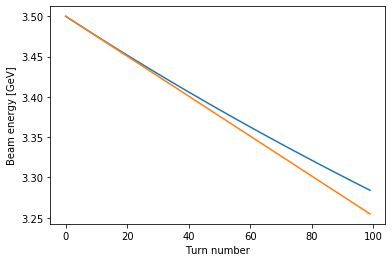

In [29]:
beamEnergyInitial = 3.5E9
nTurns = 100
turnRange = np.array(range(nTurns))
energyTurnByTurn = np.zeros(nTurns)
energyLossPerTurnInitial = e0**2*(beamEnergyInitial/electronMass)**4/(3*epsilon0*bendingRadius)/e0

beamEnergy = beamEnergyInitial
for turn in turnRange:
    energyTurnByTurn[turn] = beamEnergy
    energyLossPerTurn = e0**2*(beamEnergy/electronMass)**4/(3*epsilon0*bendingRadius)/e0
    beamEnergy = beamEnergy - energyLossPerTurn
    
plt.plot(turnRange, energyTurnByTurn/1E9)
plt.plot(turnRange, (beamEnergyInitial - turnRange*energyLossPerTurnInitial)/1E9)
plt.xlabel("Turn number")
plt.ylabel("Beam energy [GeV]")
plt.show()

<h2>Exercise 7: Radiation damping time</h2>

<ul style="list-style-type:disc;">
    <li>Caluclate the damping times of the synchrotron oscillations before and after the upgrade.</li>
</ul> 

In [30]:
revolutionTime = 1/revolutionFrequency
momentumCompationFactor = 4.16E-4
dampingIntegralD = momentumCompationFactor * circumference/(2*np.pi*bendingRadius)

print("D = "+str(dampingIntegralD)+" (well below one, 2+D can be approximate to 2)")

dampingTimeBefore = beamEnergyBefore*revolutionTime/energyLossPerTurnBefore  #not radiationPowerBefore (which is for the whole beam)
dampingTimeAfter  = beamEnergyBefore*revolutionTime/energyLossPerTurnAfter   #not radiationPowerAfter

print("SR Damping time before: "+str(dampingTimeBefore*1E3)+" ms")
print("SR Damping time after:  "+str(dampingTimeAfter*1E3)+" ms")

D = 0.004373920850699349 (well below one, 2+D can be approximate to 2)
SR Damping time before: 3.4411837627523014 ms
SR Damping time after:  1.311494467681602 ms


<h2>Exercise 8: Comparison with RF system at ESRF</h2>

<ul style="list-style-type:disc;">
    <li>Compare the parameters of the (additional) RF system with the one of the storage ring at ESRF.</li>  
</ul> 

<table>
    <thead>
        <tr>
            <th>Parameter</th>
            <th>Unit</th>
            <th>ESRF</th>
            <th>Soleil</th>
            <th>Soleil (CAS upgrade)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Beam energy, $E$</td>
            <td>GeV</td>
            <td>6</td>
            <td>2.75</td>
            <td>3.5</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Beam current, $I_\mathrm{beam}$</td>
            <td>mA</td>
            <td>200</td>
            <td>500</td>
            <td>800</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Circumference, $2 \pi R$</td>
            <td>m</td>
            <td>844</td>
            <td>354</td>
            <td>354</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Bending radius, $\rho$</td>
            <td>m</td>
            <td>23.37</td>
            <td>5.36</td>
            <td>5.36</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>RF harmonic, $h$</td>
            <td></td>
            <td>992</td>
            <td>416</td>
            <td>416 amd 832</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>RF frequency, $f_\mathrm{RF}$</td>
            <td>MHz</td>
            <td>352</td>
            <td>352</td>
            <td>352 and 704</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>RF voltage, $V_\mathrm{RF}$</td>
            <td>MV</td>
            <td>6.5</td>
            <td>3</td>
            <td>3 + >1.5</td>
        </tr>
    </tbody>
    <tbody>
        <tr>
            <td>Number of cavities</td>
            <td></td>
            <td>14</td>
            <td>4</td>
            <td>4 + ~4</td>
        </tr>
    </tbody>
</table>

<h1 style="color:rgb(255,0,0);">Transverse course</h1>

<ul style="list-style-type:disc;">
    <li><a href="https://cernbox.cern.ch/index.php/s/j7JCfPEonD5VLNG">Guido's notebook for the CAS</a></li>
    <li><a href="https://codimd.web.cern.ch/evH2Es22Qsag2PbZJjgQ_A">Guido's guidelines for Denmark CAS</a></li>
</ul> 